## Funciones Python

In [40]:
import pandas as pd
import random
from tabulate import tabulate
import matplotlib.pyplot as plt


In [52]:

## Funcion para cargar Dataset

def cargar_dataset(filepath):
    data = pd.read_csv(filepath,sep=';')
    return data

## Funcion para Porcesar datos 
def preprocesar_datos(data,columna):
    # Eliminar filas con valores faltantes
    data = data.dropna()
    # Convertir columnas de fecha a tipo datetime
    data[columna] = pd.to_datetime(data[columna], format='%d/%m/%Y')
    return data

## Funcion para sumar una columna y mostrar resultado
def suma_columna(data,columna):
    ## Suma de la columna
    data = data[columna].sum()
    return data

## Funcion para obtener el valor que mas se repite
def moda_columna(data,columna):
    ## Valor que mas se repite
    data = data[columna].mode()
    return data

# Función para generar un gráfico de barras de una columna
## bars , plot

def generar_grafico(data,columna_1,columan_2):
    plt.bar(data[columna_1], data[columan_2], color='blue')
    plt.xlabel(str(input('Ingrese el nombre del eje x'))) 
    plt.ylabel(str(input('Ingrese el nombre del eje y')))
    plt.title(str(input('Ingrese el titulo del grafico')))

    # Agrega las etiquetas de datos con 'S/. '
    for i, v in enumerate(data[columan_2]):
        plt.text(i, v, 'S/. ' + str(v), ha='center')

    # Agrega el signo de soles al eje Y
    plt.ticklabel_format(style='plain', axis='y', useLocale=True)
    plt.gca().yaxis.set_major_formatter('s/{x:,.0f}')

    plt.show()

df = cargar_dataset(r"C:\Users\User\OneDrive\Documentos\Archivos_Carlos\BBDD - No estructurada\Makro_Ventas.csv")
df1 = preprocesar_datos(df,'Fechas')
ventas_totales = suma_columna(df1,'Ventas sin IGV')
valor_repetido = moda_columna(df1,'Ventas sin IGV')
print(f'La cantidad Vendida Total es de s/.{ventas_totales.round(2)}')
print(f'El valor que mas se repite en las ventas es de {valor_repetido}')

La cantidad Vendida Total es de s/.61741913.29
El valor que mas se repite en las ventas es de 0    16.61
Name: Ventas sin IGV, dtype: float64


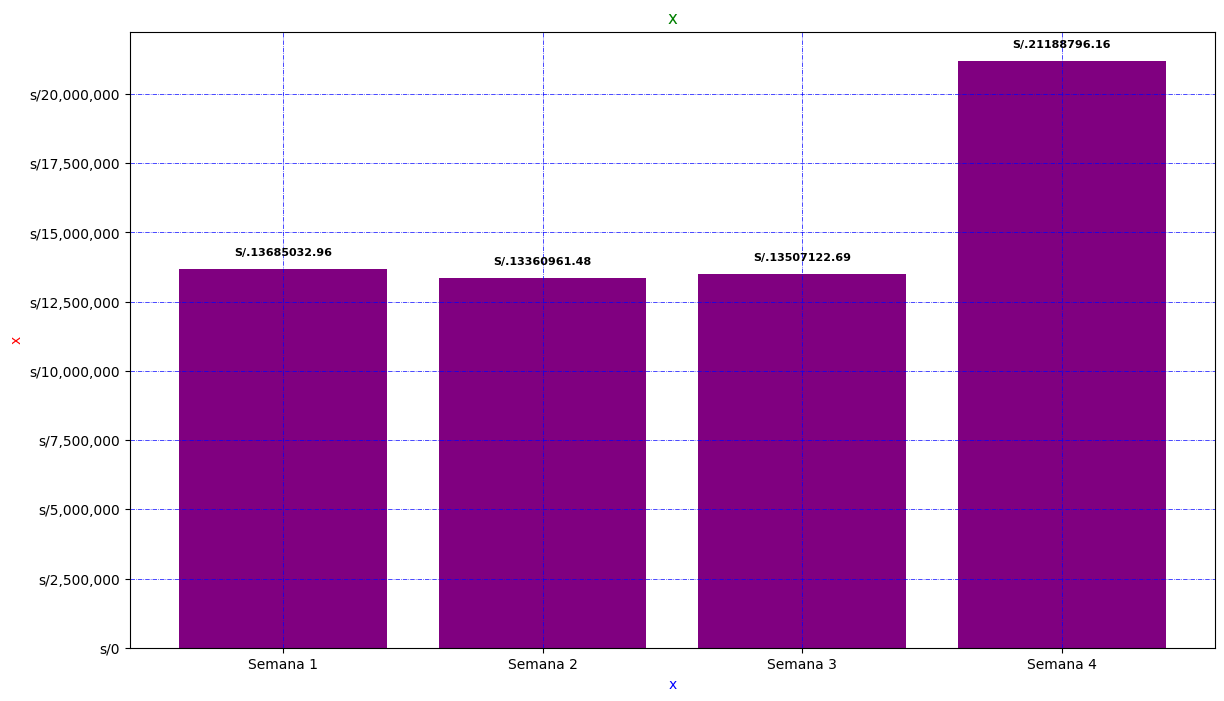

In [97]:
## Funcion del Grafico
ventas_semana = df1.groupby('Semana')['Ventas sin IGV'].sum().reset_index(name='Ventas')
ventas_semana
# Llamar a la función para generar el gráfico de barras
generar_grafico(ventas_semana,'Semana','Ventas')

In [49]:

## Ejercicio 1 :
    ## Se solicita obtener una funcion donde se permita obtener carga de archivos de un dataset

## Funcion para cargar Dataset
def cargar_dataset(filepath):
    data = pd.read_excel(filepath)
    return data


df = cargar_dataset(r"C:\Users\User\OneDrive\Documentos\Archivos_Carlos\BBDD - No estructurada\Agrupacion_2.xlsx")
df

,Categoría,Ventas sin IGV
0,Detergentes,1920005.74
1,Aceites,1475185.73
2,Pastas,956533.45
3,Galletas,912678.74
4,Salsas,719786.22
5,Conservas,503849.05
6,Cereales,311852.75
7,Jabones de Lavar,230671.48
8,Lavavajillas,215793.05
9,Lejias,206920.49


In [53]:
## Ejercicio 2:
    ## Se solicita crear una funcion que te permita cambiar el tipo de dato para un objeto fecha.Asi mismo, se pide para este proceso ETl eliminar todos los valores faltantes(Metadatos)

## Funcion para Porcesar datos 
def preprocesar_datos(data,columna):
    data = data.dropna() # Eliminar filas con valores faltantes
    # Convertir columnas de fecha a tipo datetime
    data[columna] = pd.to_datetime(data[columna], format='%d/%m/%Y')
    return data

ejercicio2 = cargar_dataset(r"C:\Users\User\OneDrive\Documentos\Archivos_Carlos\BBDD - No estructurada\Makro_Ventas.csv")

newdataset = preprocesar_datos(ejercicio2,'Fechas')
newdataset.dtypes


Año                           int64
Mes                          object
Semana                       object
Fechas               datetime64[ns]
Cadena                       object
Departamento                 object
Distrito                     object
Categoria                    object
Marca                        object
Codigo_Producto               int64
Material                     object
Unidades B2B                  int64
Peso en Toneladas           float64
Ventas sin IGV              float64
dtype: object

In [57]:
## Ejercicio 3:
    ## Se pide crear una funcion donde se busque en un objeto el valor que mas se repite
    

def calculo_moda(data,object):
    ## Creacion Moda
    data = data[object].mode()
    ## Salida
    return data


ejercicio3 = cargar_dataset(r"C:\Users\User\OneDrive\Documentos\Archivos_Carlos\BBDD - No estructurada\Makro_Ventas.csv")
df_ejercicio3 = calculo_moda(ejercicio3,'Ventas sin IGV')
print(f'El valor que mas se repite en el objeto Ventas sin IGV es {df_ejercicio3}')


El valor que mas se repite en el objeto Ventas sin IGV es 0    16.61
Name: Ventas sin IGV, dtype: float64


In [61]:
## Ejercicio 4:

    ## Se pide crear una funcion que calcule el objecto de las ventas sin IGV es decir se debe de tener el total de ventas
    
def suma_object(data,object):
    ## Creacion de la funcion
    data = data[object].sum()
    return data

ejercicio4 = cargar_dataset(r"C:\Users\User\OneDrive\Documentos\Archivos_Carlos\BBDD - No estructurada\Makro_Ventas.csv")
calculo = suma_object(ejercicio4,'Ventas sin IGV')
print(f'El total de ventas es de S/.{calculo.round(2)}')

El total de ventas es de S/.61741913.29


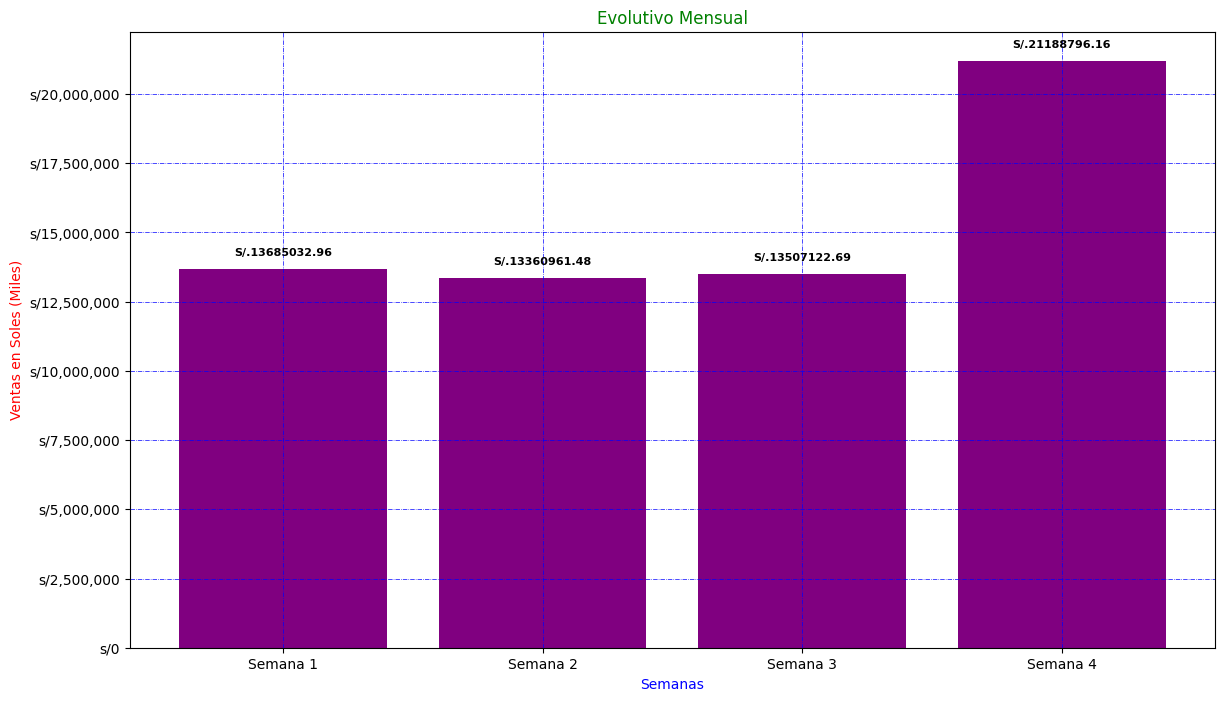

In [96]:
## Ejercicio 5:

    ##  Se pide crear una funcion que te permita crear graficos  y que se pueda cambiar 

    # Función para generar un gráfico de barras de una columna
    # ## bars , plot

def generar_grafico(data,columna_1,columna_2):
    ## Aumentando el tamaño del grafico
    plt.figure(figsize=(14,8)) 
    ## Creando procedimientos para los graficos
    plt.bar(data[columna_1], data[columna_2], color='purple') ## Si es plot quitar width
    plt.xlabel(str(input('Ingrese el nombre del eje x')),color='blue') 
    plt.ylabel(str(input('Ingrese el nombre del eje y')),color='red')
    plt.grid(color='blue',linestyle='-.',linewidth = 0.5)
    plt.title(str(input('Ingrese el titulo del grafico')),color = 'green')

    # Agrega las etiquetas de datos con 'S/.'
    for i, v in enumerate(data[columna_2]):
        plt.text(i, v + 0.02 * max(data[columna_2]), 'S/.' + str(v), ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

    # Agrega el signo de soles al eje Y
    plt.ticklabel_format(style='plain', axis='y', useLocale=True)
    plt.gca().yaxis.set_major_formatter('s/{x:,.0f}')
    plt.show()

    

ejercicio5 = cargar_dataset(r"C:\Users\User\OneDrive\Documentos\Archivos_Carlos\BBDD - No estructurada\Makro_Ventas.csv")

df_5 = ejercicio5.groupby('Semana')['Ventas sin IGV'].sum().reset_index(name='Ventas')

df5 = df_5.sort_values(by='Semana',ascending=True)

generar_grafico(df5,'Semana','Ventas')

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\User\OneDrive\Escritorio\Atento\Reportes_pbi\BBDD_CONSOLIDADO_REDES_SOCIALES.xlsx")
df

,Id,Cliente,Asesor,Estado,Canal,OpciÃ³n seleccionada,CalificaciÃ³n,Experiencia,Fecha de creaciÃ³n,Fecha de actualizaciÃ³n,...,Promotor,Neutro,Detractor,Item,Detalle_NPS,Fecha de creaciÃ³n (índice de días),Fecha de creaciÃ³n (día),Fecha de creaciÃ³n (hora),Fecha de creaciÃ³n (minuto),Rango_Hora
0,'593994937319,#NAME?,Liliana Marilu Chavesta Alvarado,Completo,WhatsApp,Muy buena,5,1,2023-05-18 07:58:00,2023-05-18 08:03:00,...,1,0,0,1,Promotor,137.331944,2023-05-18,7,5,Mañana
1,'593980019913,Mi Familia es la mejor.,Lisbeth Domenica MuÃ±oz Sandoval,Completo,WhatsApp,Muy buena,5,Exelente atenciÃ³n,2023-05-18 08:10:00,2023-05-18 08:11:00,...,1,0,0,1,Promotor,137.340278,2023-05-18,8,5,Mañana
2,'593992225518,Sebastian Diaz,Maricielo Ballena De La Cruz,Completo,WhatsApp,Muy buena,5,Todo ok,2023-05-18 08:55:00,2023-05-18 08:55:00,...,1,0,0,1,Promotor,137.371528,2023-05-18,8,5,Mañana
3,'593996555528,PUNTOHELP,Maricielo Ballena De La Cruz,Completo,WhatsApp,Muy buena,5,Agradable y rÃ¡pida,2023-05-18 09:03:00,2023-05-18 09:04:00,...,1,0,0,1,Promotor,137.377083,2023-05-18,9,5,Mañana
4,'593987247064,Kevin Vargas,Karla Valeria Jimenes Menendez,Completo,WhatsApp,Muy buena,5,Excelente,2023-05-18 09:16:00,2023-05-18 09:17:00,...,1,0,0,1,Promotor,137.386111,2023-05-18,9,5,Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,'593958602246,Liz,Maycol Salim Rimarachin Saucedo,Completo,WhatsApp,Buena,4,No me gustÃ³ q me atienden diferentes asesores...,2023-05-31 23:42:00,2023-05-31 23:47:00,...,0,1,0,1,Neutro,150.987500,2023-05-31,23,5,Noche
843,'593961793340,JonaðŸ¤,Miguel Flores Armas,Completo,WhatsApp,Buena,4,Ya me acreditaron,2023-06-01 13:23:00,2023-06-01 13:23:00,...,0,1,0,1,Neutro,151.557639,2023-06-01,13,6,Tarde
844,'593998519303,Eliana ðŸŒ»,Kerly Coto Alvarez,Completo,WhatsApp,Buena,4,Quisiera saber si fue ingresada mi solicitud,2023-06-01 15:39:00,2023-06-01 15:40:00,...,0,1,0,1,Neutro,151.652083,2023-06-01,15,6,Tarde
845,'593995107051,Gerardo Leon,Monica Estefania Pacheco Sanchez,Completo,WhatsApp,Buena,4,Personal de Call Center no explica sobre suscr...,2023-06-01 16:53:00,2023-06-01 16:54:00,...,0,1,0,1,Neutro,151.703472,2023-06-01,16,6,Tarde


In [9]:
agrupacion = df.groupby('Canal')['Item'].sum().reset_index(name='Total')
agrupacion

,Canal,Total
0,Facebook,102
1,Twitter,2
2,WhatsApp,743


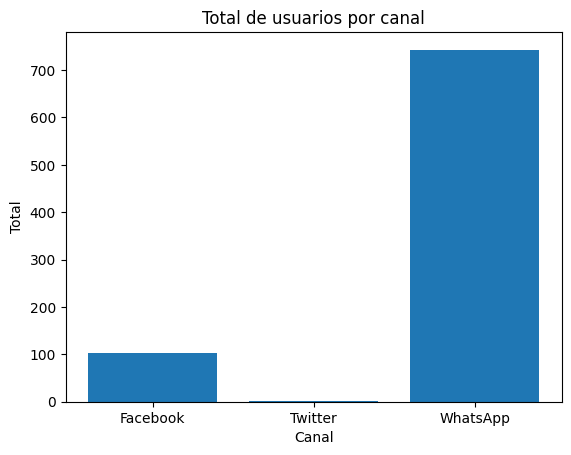

In [12]:
plt.bar(agrupacion['Canal'], agrupacion['Total'])
plt.xlabel('Canal')
plt.ylabel('Total')
plt.title('Total de usuarios por canal')
plt.show()